Connected to base (Python 3.11.5)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

# Perceptron learning rule

# initial parameters and initial line
P = 50
N = 50
w = np.zeros(N)

def step(output):
    if output > 0:
        return 1
    else:
        return -1

def update_step(P, N, w, learning_rate=1, max_iter=1000):
    x = np.random.choice([0, 1], size=(P, N))
    y = np.random.choice([-1, 1], size=P)
    converged = False
    for _ in range(max_iter):
        converged = True
        for i in range(P):
            output = np.dot(x[i], w)
            output = step(output)
            if y[i] != output:
                w += y[i]*x[i]*learning_rate
                converged = False
        if converged:
            break
        
    return converged

#a?
c = update_step(P, N, w)
print(c)

#b
Prange = np.arange(10, 200, 10)
converged = {}

for P in Prange:
    c = update_step(P, N, w)
    converged[P] = c

print(converged)

"""
Reconstruct the curve C(PN) for N = 50 as a function of P in the following way. For
 each P construct a number (nruns) of learning problems randomly and compute 1) the
 fraction of these problems for which the perceptron learning rule converges, 2) the mean
 and std of the classification error on the training set and 3) the mean and std of the number
 of iterations until convergence.
"""

def learning_rulec(P, N, w, nruns=100, max_iter = 1000):
    iterations_list = []
    error_list = [] 
    amount_converged = 0
    for _ in range(nruns):
        x = np.random.choice([0, 1], size=(P, N))
        y = np.random.choice([-1, 1], size=P)
        z = np.zeros_like(y)
        converged = False
        iterations = 0
        for _ in range(max_iter):
            converged = True
            for i in range(P):
                output = y[i]*np.dot(x[i], w)
                z[i] = output==y[i]
                if output <= 0:
                    w += y[i]*x[i]
                    converged = False
            iterations += 1 
            if converged:
                amount_converged += 1
                break
        iterations_list.append(iterations)
        error_list.append(np.sum(z)/iterations)


    fraction =  amount_converged/ nruns
    mean_error = np.mean(error_list)
    std_error = np.std(error_list)

    mean_iterations = np.mean(iterations_list)
    std_iterations = np.std(iterations_list)
    return fraction, mean_iterations, std_iterations , mean_error, std_error


N = 50
P_range = np.arange(10, 120, 10)
w = np.zeros(N)

fraction = np.zeros_like(P_range)
mean_iterations = np.zeros_like(P_range)
std_iterations = np.zeros_like(P_range)
mean_error = np.zeros_like(P_range)
std_error = np.zeros_like(P_range)

for P in P_range:
    fraction[P], mean_iterations[P], std_iterations[P], mean_error[P], std_error[P] = learning_rulec(P, N, w)

print(fraction, mean_iterations, std_iterations, mean_error, std_error)

plt.bar()
#plt.plot () I am also still struggling with how to plot these results?

# ---
def capacity(N:int, P):
    sum = 0
    for i in range(0, N):
        sum += comb(P-1, i)
    return 2*sum

def bound(N:int, P:int):
    return (np.e*P/N)**N

def three():
    """
    function for running all of exercise 3, getting plots etc
    can be thought of as "main"

    It should:
     - for N = 50, and P between 1 and 200,
     - numerically compute the capacity of C(N,P),
     - as well as the estimated bound,
     - plot them
    """

    fig = plt.figure(figsize=(10,10))

    Ps = np.linspace(1,200,200)
    N = 50
    ys = capacity(N, Ps)

    xs = np.linspace(1, 200, 200)
    bounds = bound(N, xs)

    plt.plot(Ps, ys, label="Computed")
    plt.plot(xs, bounds, label="Bound")
    plt.yscale("log")
    plt.legend()
    plt.show()

    return

def eps(N:int, P:int, delta:float = 0.01):

    return np.sqrt(-8*np.log(delta/(4*bound(N, 2*P)))/P)

def four():
    delta = 0.01

    # Compute numerically for N = 10 the dependence of epsilon on P
    Ps = np.linspace(1,1000, 1000)
    epsilons = eps(10, Ps)

    plt.plot(Ps, epsilons, label="N = 10")

    plt.legend()
    plt.title(r"$\epsilon$ as a function of P, for different values of N")
    plt.show()


    return

if __name__ == "__main__":
    # three()
    four()

True
{10: True, 20: True, 30: True, 40: True, 50: True, 60: True, 70: True, 80: True, 90: True, 100: False, 110: False, 120: False, 130: False, 140: False, 150: False, 160: False, 170: False, 180: False, 190: False}


IndexError: index 20 is out of bounds for axis 0 with size 11

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

# Perceptron learning rule

# initial parameters and initial line
P = 50
N = 50
w = np.zeros(N)

def step(output):
    if output > 0:
        return 1
    else:
        return -1

def update_step(P, N, w, learning_rate=1, max_iter=1000):
    x = np.random.choice([0, 1], size=(P, N))
    y = np.random.choice([-1, 1], size=P)
    converged = False
    for _ in range(max_iter):
        converged = True
        for i in range(P):
            output = np.dot(x[i], w)
            output = step(output)
            if y[i] != output:
                w += y[i]*x[i]*learning_rate
                converged = False
        if converged:
            break
        
    return converged

#a?
c = update_step(P, N, w)
print(c)

#b
Prange = np.arange(10, 200, 10)
converged = {}

for P in Prange:
    c = update_step(P, N, w)
    converged[P] = c

print(converged)

"""
Reconstruct the curve C(PN) for N = 50 as a function of P in the following way. For
 each P construct a number (nruns) of learning problems randomly and compute 1) the
 fraction of these problems for which the perceptron learning rule converges, 2) the mean
 and std of the classification error on the training set and 3) the mean and std of the number
 of iterations until convergence.
"""

def learning_rulec(P, N, w, nruns=100, max_iter = 1000):
    iterations_list = []
    error_list = [] 
    amount_converged = 0
    for _ in range(nruns):
        x = np.random.choice([0, 1], size=(P, N))
        y = np.random.choice([-1, 1], size=P)
        z = np.zeros_like(y)
        converged = False
        iterations = 0
        for _ in range(max_iter):
            converged = True
            for i in range(P):
                output = y[i]*np.dot(x[i], w)
                z[i] = output==y[i]
                if output <= 0:
                    w += y[i]*x[i]
                    converged = False
            iterations += 1 
            if converged:
                amount_converged += 1
                break
        iterations_list.append(iterations)
        error_list.append(np.sum(z)/iterations)


    fraction =  amount_converged/ nruns
    mean_error = np.mean(error_list)
    std_error = np.std(error_list)

    mean_iterations = np.mean(iterations_list)
    std_iterations = np.std(iterations_list)
    return fraction, mean_iterations, std_iterations , mean_error, std_error


N = 50
P_range = np.arange(10, 120, 10)
w = np.zeros(N)

fraction = np.zeros_like(P_range)
mean_iterations = np.zeros_like(P_range)
std_iterations = np.zeros_like(P_range)
mean_error = np.zeros_like(P_range)
std_error = np.zeros_like(P_range)

for i, P in enumerate(P_range):
    fraction[P], mean_iterations[P], std_iterations[P], mean_error[P], std_error[P] = learning_rulec(P, N, w)

print(fraction, mean_iterations, std_iterations, mean_error, std_error)

plt.bar()
#plt.plot () I am also still struggling with how to plot these results?

# ---
def capacity(N:int, P):
    sum = 0
    for i in range(0, N):
        sum += comb(P-1, i)
    return 2*sum

def bound(N:int, P:int):
    return (np.e*P/N)**N

def three():
    """
    function for running all of exercise 3, getting plots etc
    can be thought of as "main"

    It should:
     - for N = 50, and P between 1 and 200,
     - numerically compute the capacity of C(N,P),
     - as well as the estimated bound,
     - plot them
    """

    fig = plt.figure(figsize=(10,10))

    Ps = np.linspace(1,200,200)
    N = 50
    ys = capacity(N, Ps)

    xs = np.linspace(1, 200, 200)
    bounds = bound(N, xs)

    plt.plot(Ps, ys, label="Computed")
    plt.plot(xs, bounds, label="Bound")
    plt.yscale("log")
    plt.legend()
    plt.show()

    return

def eps(N:int, P:int, delta:float = 0.01):

    return np.sqrt(-8*np.log(delta/(4*bound(N, 2*P)))/P)

def four():
    delta = 0.01

    # Compute numerically for N = 10 the dependence of epsilon on P
    Ps = np.linspace(1,1000, 1000)
    epsilons = eps(10, Ps)

    plt.plot(Ps, epsilons, label="N = 10")

    plt.legend()
    plt.title(r"$\epsilon$ as a function of P, for different values of N")
    plt.show()


    return

if __name__ == "__main__":
    # three()
    four()

True
{10: True, 20: True, 30: True, 40: True, 50: True, 60: True, 70: True, 80: False, 90: False, 100: False, 110: False, 120: False, 130: False, 140: False, 150: False, 160: False, 170: False, 180: False, 190: False}


IndexError: index 20 is out of bounds for axis 0 with size 11

In [3]:
def four():
    delta = 0.01

    # Compute numerically for N = 10 the dependence of epsilon on P
    Ps = np.linspace(1,1000, 1000)
    epsilons = eps(10, Ps)

    plt.plot(Ps, epsilons, label="N = 10")

    plt.legend()
    plt.title(r"$\epsilon$ as a function of P, for different values of N")
    plt.show()


    return



In [4]:
def eps(N:int, P:int, delta:float = 0.01):

    return np.sqrt(-8*np.log(delta/(4*bound(N, 2*P)))/P)



In [5]:
four()

NameError: name 'bound' is not defined

In [6]:
def bound(N:int, P:int):
    return (np.e*P/N)**N



<ipython-input-4-3171925555c0>:3: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-8*np.log(delta/(4*bound(N, 2*P)))/P)


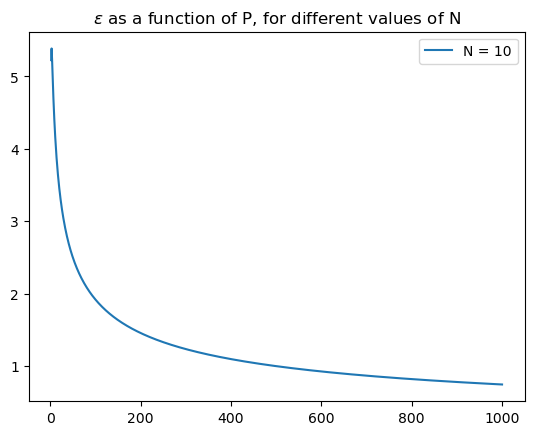

In [7]:
four()

<ipython-input-8-9c8c512f945f>:16: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(-8*np.log(delta/(4*bound(N, 2*P)))/P)


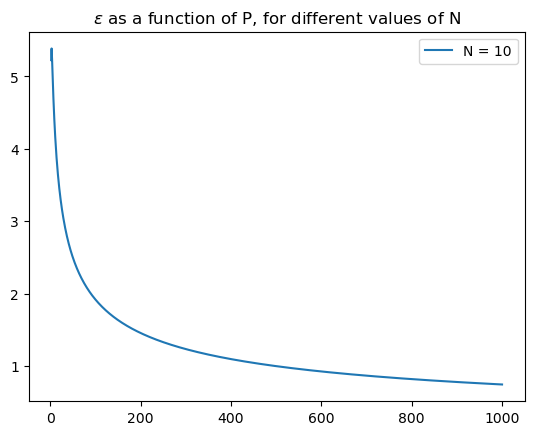

In [8]:
def four():
    delta = 0.01

    # Compute numerically for N = 10 the dependence of epsilon on P
    Ps = np.linspace(1,100000, 1000)
    epsilons = eps(10, Ps)

    plt.plot(Ps, epsilons, label="N = 10")

    plt.legend()
    plt.title(r"$\epsilon$ as a function of P, for different values of N")
    plt.show()
    return

def eps(N:int, P:int, delta:float = 0.01):
    return np.sqrt(-8*np.log(delta/(4*bound(N, 2*P)))/P)

def bound(N:int, P:int):
    return (np.e*P/N)**N

four()



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb

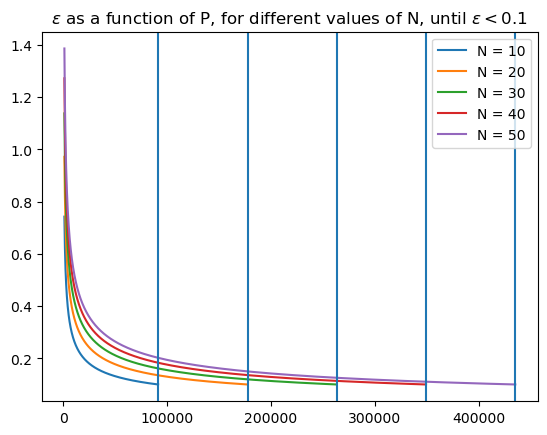

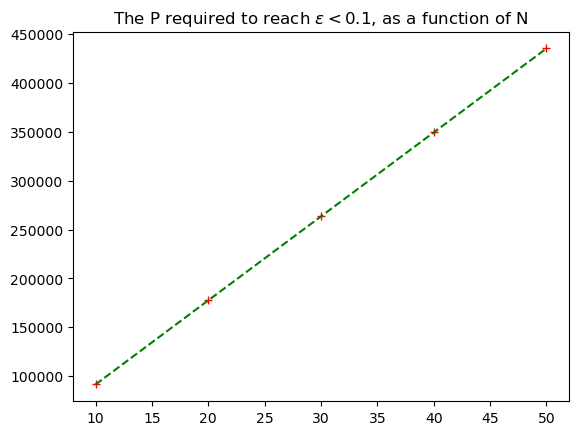

[91400, 177500, 263500, 349500, 435500]

In [16]:
def four_a():
    delta = 0.01
    Ns = [10, 20, 30, 40, 50]
    fin_Ps = []
    # Compute numerically for N = 10 the dependence of epsilon on P
    for N in Ns:
        P = 1_000
        Ps = []
        epsilons = []
        epsilon = 1
        while epsilon > 0.1:
            Ps.append(P)
            epsilon = eps(N, P, delta)
            epsilons.append(epsilon)
            P += 100
        

        fin_Ps.append(P)
        plt.plot(Ps, epsilons, label=f"N = {N}")
    

    plt.legend()
    plt.title(r"$\epsilon$ as a function of P, for different values of N, until $\epsilon < 0.1$")
    plt.show()

    # Plotting the P required to reach eps < 0.1 as a function of N
    plt.plot(Ns, fin_Ps, "r+")
    plt.plot(Ns, fin_Ps, "g--")
    plt.title("The P required to reach $\epsilon < 0.1$, as a function of N")
    plt.show()
    return fin_Ps

def eps(N:int, P:int, delta:float = 0.01):
    return np.sqrt(-8*np.log(delta/(4*bound(N, 2*P)))/P)

def bound(N:int, P:int):
    return (np.e*P/N)**N

four_a()

NameError: name 'fin_Ps' is not defined